Cluster Analysis on IMDB movie reviews

Ali Rabiee 

# Requirements & Import libraries

In [ ]:
# Requirements
!pip install unidecode
!pip install word2number
!pip install contractions
!pip install pyspellchecker

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import decomposition
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import metrics
import pickle
import random
from prettytable import PrettyTable
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
import unidecode
from word2number import w2n
import contractions
from collections import Counter
from spellchecker import SpellChecker
import re
import string 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Cluster analysis with usupervised learning

First of all, I import BOW & w2v vectors from the previous phase to do clustering.

Due to large amount of these vectors, I import them from my google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Load vectors
bow = np.load('/content/gdrive/My Drive/temp/bow.npy', allow_pickle=True)  
w2v = np.load('/content/gdrive/My Drive/temp/w2v.npy', allow_pickle=True)

Mounted at /content/gdrive


In [ ]:
# Import dataset from my drive

# data = pd.read_csv("dataset.csv")
data = pd.read_csv('/content/gdrive/My Drive/Datasets/dataset.csv')

In [ ]:
# convert sentiment results to number {0,1}
data['sentiment'].replace('negative',0,inplace=True)
data['sentiment'].replace('positive',1,inplace=True)
labels = data['sentiment']

In [ ]:
# Define a def for visualizing in 2-D space
# PCA

def visualize(vec, preds):
    pca = decomposition.PCA(n_components=2)
    reduced = pca.fit_transform(vec)

    plt.figure(figsize=(8,6))
    plt.scatter(reduced[:, 0], reduced[:, 1], c=preds, 
                edgecolor='b', alpha=0.7, s=40,
                cmap=plt.cm.get_cmap('nipy_spectral', 10))

    plt.colorbar()
    plt.title('dataset PCA projection in 2-D space');   

In [ ]:
# Define a def for scores

def clustering_analysis(labels, predictions):
    
    homogeneity_score = metrics.homogeneity_score(labels, predictions)
    v_measure_score = metrics.v_measure_score(labels, predictions)
    try:
        sil_score = metrics.silhouette_score(w2v, predictions)
    except:
        sil_score = metrics.silhouette_score(w2v_reduced, predictions)
    fowlkes_mallows_score = metrics.fowlkes_mallows_score(labels, predictions)
    accuracy = accuracy_score(labels, predictions) 
    precision = metrics.precision_score(labels, predictions)
    recall = metrics.recall_score(labels, predictions)
    f1 = metrics.f1_score(labels, predictions)

    results = [homogeneity_score, v_measure_score, sil_score, 
               fowlkes_mallows_score, accuracy, precision, recall, f1]

    print(f"Report: Classification\n{classification_report(labels, predictions, target_names=['positive','negative'])}")
    confusion_matrix = pd.DataFrame(metrics.confusion_matrix(labels, predictions)) 
    sns.heatmap(confusion_matrix, annot=True, cmap="Blues");
    print(f"Accuracy: {accuracy:.6f}")
    print("Precision:{:.6f}".format(precision))
    print("Recall:{:.6f}".format(recall))
    print("F1 score:{:.6f}".format(f1))
    print(f"homogeneity_score: {homogeneity_score:.6f}")
    print(f"v_measure_score: {v_measure_score:.6f}")
    print(f"silhouette_score: {sil_score:.6f}")
    print(f"fowlkes_mallows_score: {fowlkes_mallows_score:.6f}")
    return results

## K-means

In [ ]:
# Number of clusters = 2
kmeans_1 = KMeans(n_clusters=2, random_state=1).fit(w2v)
kmeans_preds_1 = kmeans_1.predict(w2v)

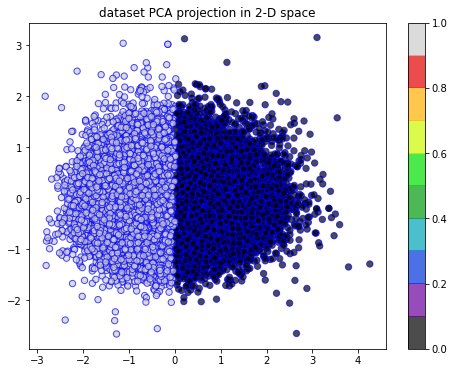

In [ ]:
visualize(w2v, kmeans_preds_1)

In [ ]:
# Number of clusters = 3
kmeans_2 = KMeans(n_clusters=3, random_state=1).fit(w2v)
kmeans_preds_2 = kmeans_2.predict(w2v)

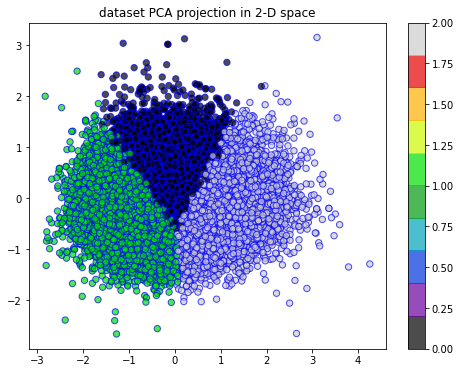

In [ ]:
visualize(w2v, kmeans_preds_2)

In [ ]:
# Number of clusters = 4
kmeans_3 = KMeans(n_clusters=4, random_state=1).fit(w2v)
kmeans_preds_3 = kmeans_3.predict(w2v)

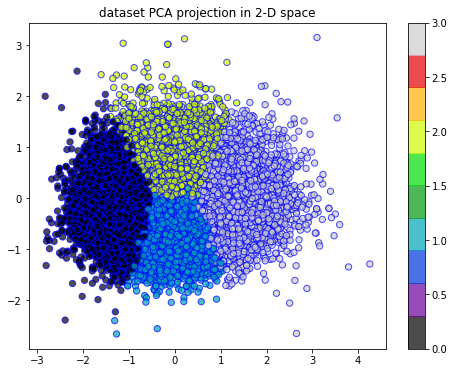

In [ ]:
visualize(w2v, kmeans_preds_3)

Now we compare 2 cluster case with labels.

Report: Classification
              precision    recall  f1-score   support

    positive       0.61      0.62      0.61     22081
    negative       0.63      0.62      0.62     22919

    accuracy                           0.62     45000
   macro avg       0.62      0.62      0.62     45000
weighted avg       0.62      0.62      0.62     45000

Accuracy: 0.618133
Precision:0.627439
Recall:0.615995
F1 score:0.621664
homogeneity_score: 0.040675
v_measure_score: 0.040670
silhouette_score: 0.034724
fowlkes_mallows_score: 0.527972


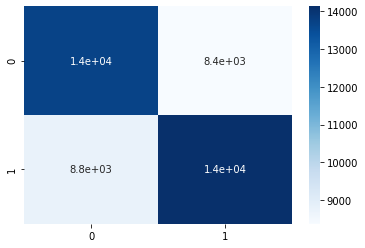

In [ ]:
# Comparison
kmeans_results = clustering_analysis(kmeans_preds_1, labels)

## GMM

In [ ]:
# Number of clusters = 2
gmm_1 = GaussianMixture(n_components=2).fit(w2v)
gmm_preds_1 = gmm_1.predict(w2v)

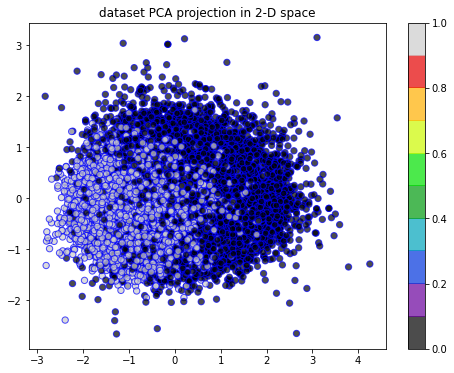

In [ ]:
visualize(w2v, gmm_preds_1)

In [ ]:
# Number of clusters = 3
gmm_2 = GaussianMixture(n_components=3).fit(w2v)
gmm_preds_2 = gmm_2.predict(w2v)

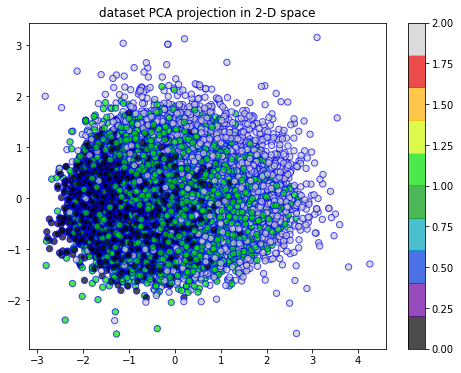

In [ ]:
visualize(w2v, gmm_preds_2)

In [ ]:
# Number of clusters = 4
gmm_3 = GaussianMixture(n_components=4).fit(w2v)
gmm_preds_3 = gmm_3.predict(w2v)

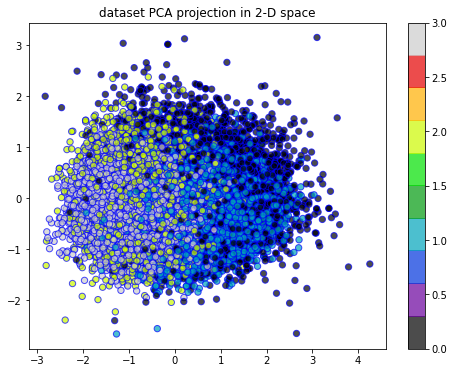

In [ ]:
visualize(w2v, gmm_preds_3)

Now we compare 2 cluster case with labels.

Report: Classification
              precision    recall  f1-score   support

    positive       0.50      0.50      0.50     22573
    negative       0.50      0.50      0.50     22427

    accuracy                           0.50     45000
   macro avg       0.50      0.50      0.50     45000
weighted avg       0.50      0.50      0.50     45000

Accuracy: 0.497378
Precision:0.495756
Recall:0.497392
F1 score:0.496572
homogeneity_score: 0.000020
v_measure_score: 0.000020
silhouette_score: 0.034724
fowlkes_mallows_score: 0.499994


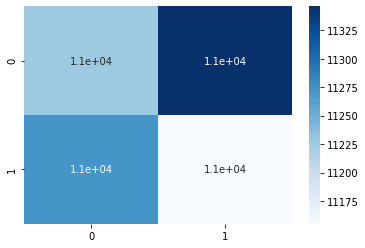

In [ ]:
# Comparison
gmm_results = clustering_analysis(gmm_preds_1, labels)

## Birch

In [ ]:
# Due to RAM limitation I have to reduce dataset a little.
random_indices = random.sample(range(45000), 16000)
data_reduced = [np.array(data.sentiment)[i] for i in random_indices]
data_reduced = np.array(data_reduced)
w2v_reduced = [w2v[i] for i in random_indices]
w2v_reduced = np.array(w2v_reduced)

In [ ]:
# Number of clusters = 2
brc_1 = Birch(n_clusters=2).fit(w2v_reduced)        
brc_preds_1 = brc_1.predict(w2v_reduced)

In [ ]:
for i in range(len(brc_preds_1)):
    if brc_preds_1[i] == 1:
        brc_preds_1[i] = 0
    else:
        brc_preds_1[i] = 1

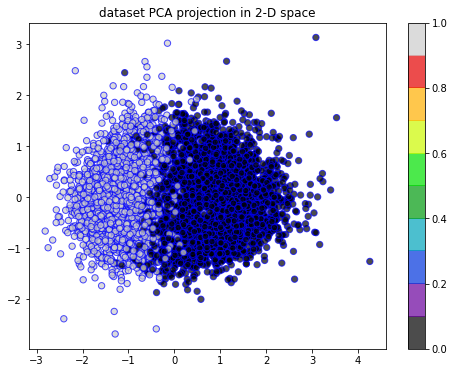

In [ ]:
visualize(w2v_reduced, brc_preds_1)

In [ ]:
# Number of clusters = 3
brc_2 = Birch(n_clusters=3).fit(w2v_reduced)
brc_preds_2 = brc_2.predict(w2v_reduced)

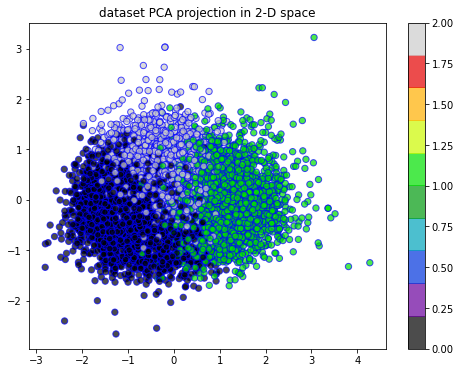

In [ ]:
visualize(w2v_reduced, brc_preds_2)

In [ ]:
# Number of clusters = 4
brc_3 = Birch(n_clusters=4).fit(w2v_reduced)
brc_preds_3 = brc_3.predict(w2v_reduced)

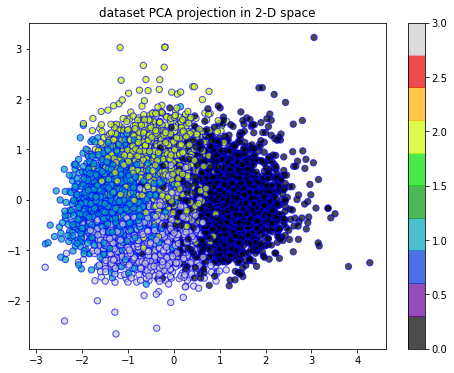

In [ ]:
visualize(w2v_reduced, brc_preds_3)

Now we compare 2 cluster case with labels.


Report: Classification
              precision    recall  f1-score   support

    positive       0.77      0.60      0.68     10218
    negative       0.49      0.67      0.57      5782

    accuracy                           0.63     16000
   macro avg       0.63      0.64      0.62     16000
weighted avg       0.67      0.63      0.64     16000

Accuracy: 0.629875
Precision:0.491188
Recall:0.674853
F1 score:0.568556
homogeneity_score: 0.055911
v_measure_score: 0.054296
silhouette_score: 0.035380
fowlkes_mallows_score: 0.551326


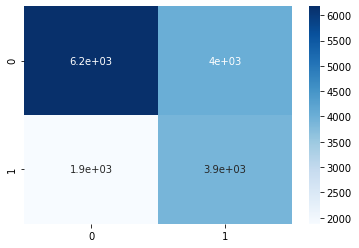

In [ ]:
# Comparison
brc_results = clustering_analysis(brc_preds_1, data_reduced)

## Comparison

In [ ]:
t = PrettyTable()

t.field_names = ["Model", "homogeneity_score", "v_measure_score",
                 "silhouette_score", "fowlkes_mallows_score", 
                 "Accuracy", "Precision", "Recall", "F1 Score"]

kmeans_results.insert(0, "k-means")
gmm_results.insert(0, "GMM")
brc_results.insert(0, "Birch")

t.add_row(kmeans_results)
t.add_row(gmm_results)
t.add_row(brc_results)

In [ ]:
print(t)

+---------+------------------------+-----------------------+----------------------+-----------------------+---------------------+---------------------+--------------------+--------------------+
|  Model  |   homogeneity_score    |    v_measure_score    |   silhouette_score   | fowlkes_mallows_score |       Accuracy      |      Precision      |       Recall       |      F1 Score      |
+---------+------------------------+-----------------------+----------------------+-----------------------+---------------------+---------------------+--------------------+--------------------+
| k-means |  0.040674943142444964  |  0.04066985473980334  | 0.034723748585675535 |   0.5279718449134736  |  0.6181333333333333 |  0.6274387804986445 | 0.6159954622802042 | 0.621664464993395  |
|   GMM   | 1.9839444131969223e-05 | 1.983936882318463e-05 | 0.034723748585675535 |  0.49999416175348765  | 0.49737777777777775 | 0.49575574418914714 | 0.4973915369866679 | 0.4965722934472934 |
|  Birch  |  0.055910713547985

## Analyze K-means with 4 clusters

In [ ]:
positive_indices = np.where(kmeans_3.labels_ == 0)[0]
selected_comments = data.iloc[positive_indices[:6]]
selected_comments

,comment,sentiment
1,If you're a layman interested in quantum theor...,0
7,It's a simple fact that there are many of us f...,1
11,Audiences today will probably watch a film lik...,1
17,I know many people have a special fondness for...,1
19,The subject of children being terminally ill i...,1
27,"Well, if you are one of those Katana's film-nu...",1


In [ ]:
for i, comment in enumerate(selected_comments.comment):
    print(f'comment {i+1} : {comment}')

comment 1 : If you're a layman interested in quantum theory and string theory, read "The Elegant Universe" by Brian Greene of Columbia University, and "The Universe in a Nutshell" by Stephen Hawking of Cambridge.<br /><br />Recipe for #$*!:<br /><br />3 parts bombastic New Age pontificator, 2 parts pseudoscientist, 2 parts real scientist<br /><br />Mix together until ingredients are indistinguishable from each other and spread on celluloid thin enough that there is no discernible substance.<br /><br />Serving suggestion: barf bags.
comment 2 : It's a simple fact that there are many of us from the 80's generation who grew up loving those loopy John Cusack comedies made by Savage Steve Holland, and while I prefer there other more bizarre, out-there flick, Better Off Dead, it's hard for me to dislike One Crazy Summer, a movie I grew up loving wholeheartedly as a kid into my teens. OCS was a follow-up to Better Off Dead, returning Cusack and Curtis Armstrong from that film. <br /><br />Cus

# Fine-Tuning

In [ ]:
# Define a def for scores

def analysis(labels, predictions):
    print(f"Report: Classification\n{classification_report(labels, predictions, target_names=['positive','negative'])}")
    confusion_matrix = pd.DataFrame(metrics.confusion_matrix(labels, predictions)) 
    sns.heatmap(confusion_matrix, annot=True, cmap="Blues");
    print(f"Accuracy: {accuracy_score(labels, predictions):.6f}")
    print("Precision:{:.6f}".format(metrics.precision_score(labels, predictions)))
    print("Recall:{:.6f}".format(metrics.recall_score(labels, predictions)))
    print("F1 score:{:.6f}".format(metrics.f1_score(labels, predictions)))

## MLP on new dataset

### Pre-Processing

In [ ]:
# Load dataset
data_new = pd.read_csv('dataset2.csv')
data2 = data_new.copy()

In [ ]:
# Summary of the dataset
data2.describe()

,sentiment
count,500.000000
mean,0.498000
std,0.500497
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# Sentiment count
data2['sentiment'].value_counts()

0    251
1    249
Name: sentiment, dtype: int64

In [ ]:
def low_lvl_preprocessing(text):

    # Lower-case
    cleaned_text = text.lower()

    # Expand shortened words, e.g. don't to do not
    cleaned_text = contractions.fix(cleaned_text)

    # Remove numbers from comments
    cleaned_text = cleaned_text.replace('\d+', '')

    # Remove special characters
    cleaned_text = re.sub('\[.*?\]', '', cleaned_text)
    cleaned_text = re.sub('[%s]'%re.escape(string.punctuation), '', cleaned_text)
    cleaned_text = re.sub('\w*\d\w*', '', cleaned_text)
    cleaned_text = re.sub('[''"",,,]', '', cleaned_text)
    cleaned_text = re.sub('\n', '', cleaned_text)
    cleaned_text = re.sub('[^A-Za-z0-9 ]+', '', cleaned_text)

    # Remove the punctuation =>  !"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`
    PUNCT_TO_REMOVE = string.punctuation
    cleaned_text = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

    return cleaned_text

In [ ]:
cleaned1 = lambda x:low_lvl_preprocessing(x)
data2 = data2.copy()
data2['comment'] = pd.DataFrame(data2.comment.apply(cleaned1))
data2.head(10)

,comment,sentiment
0,This is bad It has every cliched gangbad copLA...,0
1,Its his training day I saw this movie on tv on...,0
2,The most mundane cliched junk Ive seen in a lo...,0
3,D The headline summarizes the movie Denzel get...,1
4,Too much unbelievability Denzel is a great act...,0
5,What an awful movie I thought with the Oscar a...,0
6,Predictably Ridiculous Even Denzel a fine acto...,0
7,He did not deserve to win for this role Althou...,0
8,Trash Day I fortunately discipline myself to r...,0
9,Its hard to believe that this film received an...,0


In [ ]:
def high_lvl_preprocessing(text):
    
    cleaned_text = text
    
    # Remove accented characters from text, e.g. café
    cleaned_text = unidecode.unidecode(cleaned_text)
    
    # Removal of Emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    cleaned_text = emoji_pattern.sub(r'', cleaned_text)
    
    # Removal of URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    cleaned_text = url_pattern.sub(r'', cleaned_text)
    
    # Stop words removal
    STOPWORDS = stopwords.words('english')
    cleaned_text = " ".join([word for word in str(cleaned_text).split() if word not in STOPWORDS])

    # lemma
    lemmatizer = WordNetLemmatizer()
    cleaned_text = " ".join([lemmatizer.lemmatize(word) for word in cleaned_text.split()])

    # stemming
    stemmer = PorterStemmer()
    cleaned_text = " ".join([stemmer.stem(word) for word in cleaned_text.split()])

    return cleaned_text

In [ ]:
cleaned2 = lambda x:high_lvl_preprocessing(x)
data2['comment'] = pd.DataFrame(data2.comment.apply(cleaned2))
data2.head(10)

,comment,sentiment
0,thi bad It everi clich gangbad coplarooki caug...,0
1,it train day I saw movi tv My sisterinlaw kept...,0
2,the mundan clich junk ive seen long time train...,0
3,D the headlin summar movi denzel get oscar one...,1
4,too much unbeliev denzel great actor I enjoy o...,0
5,what aw movi I thought oscar award given denze...,0
6,predict ridicul even denzel fine actor reciev ...,0
7,He deserv win role although russel crow talent...,0
8,trash day I fortun disciplin rent dvd purchas ...,0
9,it hard believ film receiv anyth turkey year a...,0


In [ ]:
# Word tokenize
data2['comment'] = data2['comment'].apply(word_tokenize)
data2.head()

,comment,sentiment
0,"[thi, bad, It, everi, clich, gangbad, coplaroo...",0
1,"[it, train, day, I, saw, movi, tv, My, sisteri...",0
2,"[the, mundan, clich, junk, ive, seen, long, ti...",0
3,"[D, the, headlin, summar, movi, denzel, get, o...",1
4,"[too, much, unbeliev, denzel, great, actor, I,...",0


In [ ]:
# Removal of Frequent words
cnt = Counter()
for text in data2["comment"].values:
    for word in text:
        cnt[word] += 1
cnt.most_common(10)

[('I', 897),
 ('the', 293),
 ('beatl', 278),
 ('like', 211),
 ('movi', 195),
 ('thi', 193),
 ('love', 189),
 ('one', 174),
 ('great', 149),
 ('It', 140)]

In [ ]:
# Remove top 10 frequent words 

freq_words = [x for i, x in enumerate(cnt.most_common(10)) if i!=4 and i!=6 and i!=9]
FREQWORDS = set([w for (w, wc) in freq_words])

def remove_freqwords(text):
    return list([word for word in text if word not in FREQWORDS])

data2["comment"] = data2["comment"].apply(lambda text: remove_freqwords(text))
data2.head()

,comment,sentiment
0,"[bad, It, everi, clich, gangbad, coplarooki, c...",0
1,"[it, train, day, saw, movi, tv, My, sisterinla...",0
2,"[mundan, clich, junk, ive, seen, long, time, t...",0
3,"[D, headlin, summar, movi, denzel, get, oscar,...",1
4,"[too, much, unbeliev, denzel, actor, enjoy, ov...",0


In [ ]:
# Removal of Rare words

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

def remove_rarewords(text):
    return list([word for word in text if word not in RAREWORDS])

data2["comment"] = data2["comment"].apply(lambda text: remove_rarewords(text))
data2.head()

,comment,sentiment
0,"[bad, It, everi, clich, gangbad, coplarooki, c...",0
1,"[it, train, day, saw, movi, tv, My, sisterinla...",0
2,"[mundan, clich, junk, ive, seen, long, time, t...",0
3,"[D, headlin, summar, movi, denzel, get, oscar,...",1
4,"[too, much, unbeliev, denzel, actor, enjoy, ov...",0


In [ ]:
# BOW
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=500)
data_comments = [' '.join([str(elem) for elem in sublist]) for sublist in data2['comment']]
bow = bow_vectorizer.fit_transform(data_comments)
bow.shape

(500, 500)

In [ ]:
# Split dataset
X = bow
y = data2['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

### Applying MLP model

Report: Classification
              precision    recall  f1-score   support

    positive       0.69      0.82      0.75        45
    negative       0.83      0.69      0.75        55

    accuracy                           0.75       100
   macro avg       0.76      0.76      0.75       100
weighted avg       0.76      0.75      0.75       100

Accuracy: 0.750000
Precision:0.826087
Recall:0.690909
F1 score:0.752475


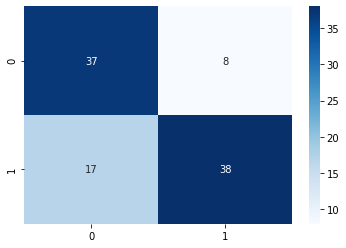

In [ ]:
'''
Parameters :
hidden_layer_sizes=250
activation='relu'
solver='adam'
L2 penalty (regularization term) parameter= 0.0001
Maximum number of iterations= 300
'''
mlp = MLPClassifier(hidden_layer_sizes=250, activation='relu', max_iter=300).fit(X_train, y_train)
predictions = mlp.predict(X_test)
analysis(y_test, predictions)

## First Phase best model

In [ ]:
# Load vectorizer and best model from previous phase

vectorizer = pickle.load(open('bow_vectorizer.pkl', 'rb'))
mlp_model = pickle.load(open('best.pkl', 'rb'))

In [ ]:
X = data2.comment
y = data2['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
x_tr = vectorizer.transform(X_train.apply(lambda x: ' '.join(x)))
x_te = vectorizer.transform(X_test.apply(lambda x: ' '.join(x)))

Report: Classification
              precision    recall  f1-score   support

    positive       0.85      0.77      0.81        52
    negative       0.77      0.85      0.81        48

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100

Accuracy: 0.810000
Precision:0.773585
Recall:0.854167
F1 score:0.811881


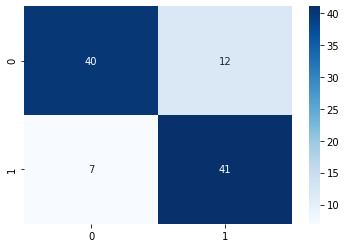

In [ ]:
# Fit the best model on new data
mlp_model.fit(x_tr, y_train)
predictions = mlp_model.predict(x_te)
analysis(y_test, predictions)